#Simple Linear Regression
1.Implement Linear Regression and calculate sum of residual error on the following
Datasets.
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
y = [1, 3, 2, 5, 7, 8, 8, 9, 10, 12]

Importing Libraries


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

Dataset :

In [3]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

Plotting the Dataset points

In [4]:
from sklearn import linear_model
reg = linear_model.LinearRegression() #creating a linear regression object
reg.fit(x.reshape(-1,1), y.reshape(-1,1)) # reshaping into 2D array

LinearRegression()

Predicting the results :

In [5]:
y_pred = reg.predict(x.reshape(-1,1))
print(y_pred)

[[ 1.23636364]
 [ 2.40606061]
 [ 3.57575758]
 [ 4.74545455]
 [ 5.91515152]
 [ 7.08484848]
 [ 8.25454545]
 [ 9.42424242]
 [10.59393939]
 [11.76363636]]


Plotting the Regression Line :

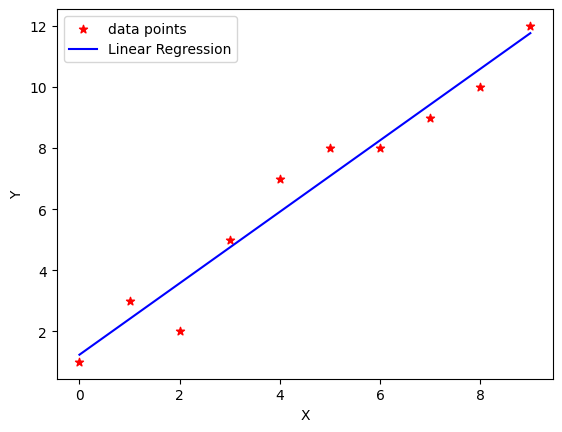

In [29]:
plt.scatter(x, y,color='red',marker='*',label='data points')
plt.plot(x, reg.predict(x.reshape(-1,1)),label='Linear Regression',color='blue')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

Sum of residual Error :

In [7]:
print("Sum of Residual Error :")
#scratch
re = 0
for i in range(y.shape[0]):
  re += (y[i] - y_pred[i])
print(re)

#using numpy
res = y.flatten() - y_pred.flatten() # Used flatten() because y_pred gives a 2D array to convert into 1D
np.sum(res)

Sum of Residual Error :
[1.33226763e-15]


1.3322676295501878e-15

#Analytical Formula

The analytical formula for Simple Linear Regression is :
y = β0 + β1*x + ε
here , β0 = Intercept ,
β1 = slope ,
ε = residual error

##Calculating Regression Coefficients

In [8]:
#using formulas to calculate
n=len(x)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_xy = np.sum(x*y)
sum_x2 = sum(i**2 for i in x)

b1 = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x ** 2) # slope β1

b0 = (sum_y - b1 * sum_x) / n # intercept β0

print(" The Regression Coefficients are :")
print("Slope β0 = ",b0)
print("Intercept β1 = ",b1)

 The Regression Coefficients are :
Slope β0 =  1.2363636363636368
Intercept β1 =  1.1696969696969697


## Evaluation Scores : SSE , R2

In [9]:
# SSE
sse = np.sum(res**2) # res = y - y_pred
print("Sum Squared Error (SSE) = ",sse)

#R_square
r2 = 1 - (sse / np.sum((y - np.mean(y))**2))
print("R Square (R2) = ",r2)



Sum Squared Error (SSE) =  5.624242424242423
R Square (R2) =  0.952538038613988


# Gradient Descent


##Full - Batch Gradient Descent

In [43]:
#initializing parameters
theta0 = 0 #intercept
theta1 = 0 #slope
alpha = 0.01 #learning rate
m = len(x) #number of samples
iter = 1000 #no. of iterations

for i in range(iter):
  hx = theta0 + theta1 * x #hypothesis
  error = hx - y #error

  d_theta0 = (1/m) * np.sum(error) #derivative of theta0
  d_theta1 = (1/m) * np.sum(error * x) #derivative of theta1

  theta0 = theta0 - alpha * d_theta0 #updating theta0
  theta1 = theta1 - alpha * d_theta1 #updating theta1

print("The Regression Coefficients are :(Full Batch)")
print("Slope β0 = ",theta0)
print("Intercept β1 = ",theta1)


The Regression Coefficients are :(Full Batch)
Slope β0 =  1.175803611388339
Intercept β1 =  1.1793547634798334


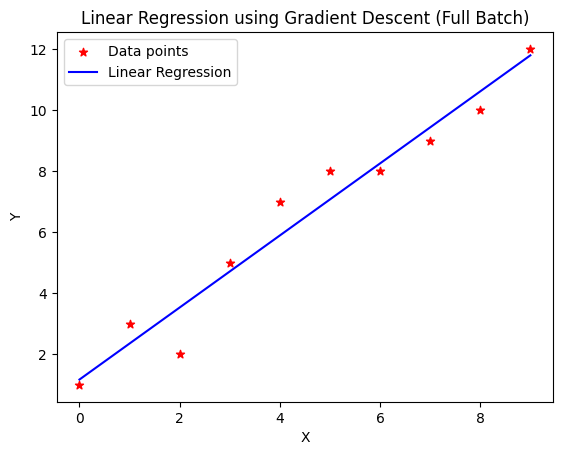

In [30]:
# Plot the result
plt.scatter(x, y, color='red', label='Data points',marker='*')
plt.plot(x, theta0 + theta1 * x, label='Linear Regression', color='blue')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression using Gradient Descent (Full Batch)')
plt.legend()
plt.show()

In [32]:
#Calculating R2 & SSE
y_pred = theta0 + theta1 * x
res = y - y_pred
sse = np.sum(res**2)
r2 = 1 - (sse / np.sum((y - np.mean(y))**2))
print("R Square (R2) = ",r2)
print("Sum Squared Error (SSE) = ",sse)

R Square (R2) =  0.9524484259150697
Sum Squared Error (SSE) =  5.634861529064237


##Stochastic Gradient Descent

In [50]:
from sklearn.linear_model import SGDRegressor
model = SGDRegressor(max_iter=1000, learning_rate='constant', eta0=0.01)
model.fit(x.reshape(-1,1), y.reshape(-1,1))

Y_p = model.predict(x.reshape(-1,1))

print("The Regression Coefficients are :(Stochastic)")
print("Slope β0 = ",model.intercept_)
print("Intercept β1 = ",model.coef_)


The Regression Coefficients are :(Stochastic)
Slope β0 =  [0.7293574]
Intercept β1 =  [1.22174813]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [42]:
#Calculating R2 & SSE
res = y - Y_p
sse = np.sum(res**2)
r2 = 1 - (sse / np.sum((y - np.mean(y))**2))
print("R Square (R2) = ",r2)
print("Sum Squared Error (SSE) = ",sse)

R Square (R2) =  0.936402009901731
Sum Squared Error (SSE) =  7.5363618266448755


#Comparing the three

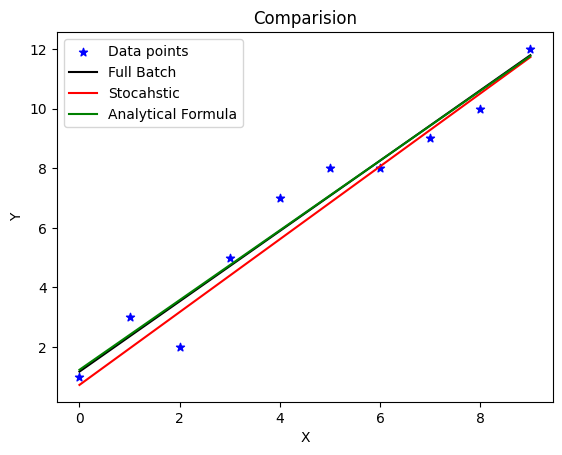

In [52]:
plt.scatter(x, y, color='blue', label='Data points',marker='*')
plt.plot(x, theta0 + theta1 * x, label='Full Batch', color='black')
plt.plot(x, model.intercept_ + model.coef_ * x, label='Stocahstic', color='red')
plt.plot(x, reg.predict(x.reshape(-1,1)),label='Analytical Formula',color='green')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Comparision')
plt.legend()
plt.show()